# Importing the Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from subprocess import check_output

In [5]:
import seaborn as sns

# Reading the Dataset

In [6]:
fakenews = pd.read_csv('./fake.csv')

In [7]:
fakenews.head(10)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,100percentfedup.com,US,25689.0,Hillary Goes Absolutely Berserk On Protester A...,0.000,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,0,1,0,0,0,bias
6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,100percentfedup.com,US,25689.0,BREAKING! NYPD Ready To Make Arrests In Weiner...,0.701,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,100percentfedup.com,US,25689.0,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,0.188,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,2016-11-07T10:20:06.409+02:00,100percentfedup.com,US,25689.0,BREAKING: CLINTON CLEARED...Was This A Coordin...,0.144,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,english,2016-11-07T10:20:27.252+02:00,100percentfedup.com,US,25689.0,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",0.995,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [8]:
fakenews.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [9]:
print("Types and counts of stories", fakenews.groupby(["type"]).size())

Types and counts of stories type
bias            443
bs            11492
conspiracy      430
fake             19
hate            246
junksci         102
satire          146
state           121
dtype: int64


# Cleaning the Null Values if Any

In [10]:
fakenews.info

<bound method DataFrame.info of                                            uuid  ord_in_thread  \
0      6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1      2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2      c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3      7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4      0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   
5      8f30f5ea14c9d5914a9fe4f55ab2581772af4c31              0   
6      d3cc0fe38f41a59f7c48f8c3528ca5f74193148f              0   
7      b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4              0   
8      a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6              0   
9      f54d8e13010d0a79893995ee65360ad4b38b5a35              0   
10     4d3faf17519cfa46ca754ab8068428818dbb2bf3              0   
11     7f90d71cc69893f4c91e8a55f2c4da52d88cd7c1              0   
12     fd2c048d7e03f7260a8d75725b0441c627578f1a              0   
13     c8d4c0a88af223f1b41e3e966ecd98ceb22ab

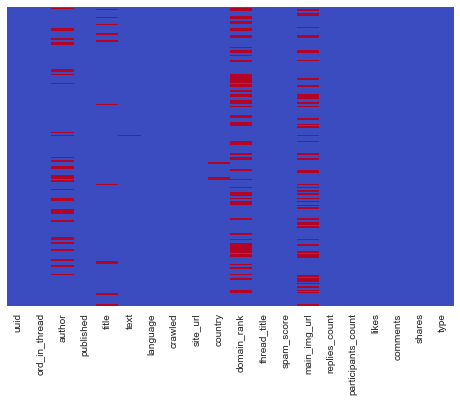

In [11]:
sns.heatmap(fakenews.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

# Exploratory Data

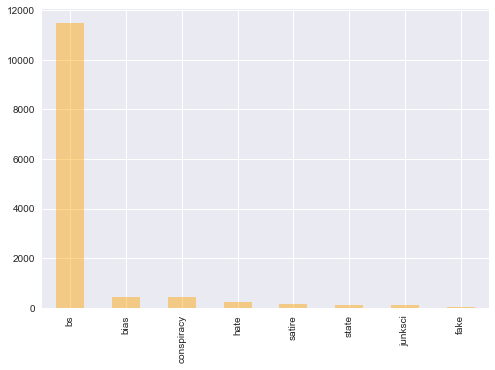

In [12]:
fakenews.type.value_counts().plot(kind='bar', color = 'orange', alpha=0.45)

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fakenews, test_size = 0.25)

In [15]:
trainone = train[train["language"]=="english"]
testone = test[test["language"]=="english"]
#train_one.columns.values
#print(len(test_one),len(train_one))
#import nltk
from nltk.corpus import stopwords 
train.columns.values
#Text_col = train["text"]
#Author_col = train["author"]
#Site_col = train["site_url"]
#Title_col = train["title"]
#Thread_col = train["thread_title"]
train.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
12290,ab2d548c98184283257040fb42b9b70711d81e69,0,Julius Hubris,2016-11-14T15:13:45.891+02:00,Dublin Council Criticised For Turning On Xmas ...,0 Add Comment \nAN ANGRY mob of Christmas shop...,english,2016-11-14T15:13:45.891+02:00,waterfordwhispersnews.com,US,58305.0,Dublin Council Criticised For Turning On Xmas ...,0.000,http://waterfordwhispersnews.com/wp-content/up...,0,1,0,0,0,bs
1949,a75257e575e31483cd0d7339ad2a5f802d2624b9,0,Corbett,2016-11-11T17:49:12.253+02:00,Newsbud Launches Phase 2 Funding Drive,Podcast: Play in new window | Download | Embed...,english,2016-11-11T17:49:12.253+02:00,corbettreport.com,NL,NaN,Newsbud Launches Phase 2 Funding Drive,0.000,NaN,0,1,0,0,0,bs
9401,b9977818d7eeac64722fb887eea5e114c6abe2c2,0,Ryan Banister,2016-11-02T16:44:11.216+02:00,Hitler or Hillary?,\nA man reads various quotes to people on the ...,english,2016-11-02T16:44:11.216+02:00,thedailysheeple.com,US,63072.0,Hitler or Hillary?,0.000,NaN,0,1,0,0,0,bs
11326,af10d37ff790792caffaf077e3f286dc76eaf53e,0,Amy Moreno,2016-11-02T19:09:00.000+02:00,AMAZING VIDEO : Hispanics for Trump in Miami S...,AMAZING VIDEO : Hispanics for Trump in Miami S...,english,2016-11-02T21:21:50.349+02:00,truthfeed.com,US,NaN,AMAZING VIDEO : Hispanics for Trump in Miami S...,0.032,http://truthfeed.com/wp-content/uploads/2016/1...,0,0,0,0,0,bs
2056,6a9121e80e4d877ef0e9dff9e2e90f07aed90e98,0,stclair,2016-11-01T02:00:00.000+02:00,The US Threatens Irish Neutrality,“We declare the right of the people of Ireland...,english,2016-11-01T11:09:19.553+02:00,counterpunch.org,US,23950.0,The US Threatens Irish Neutrality,0.097,http://i1.wp.com/www.counterpunch.org/wp-conte...,0,1,0,0,0,bs


In [17]:
import re
def refineWords(s):
    letters_only = re.sub("[^a-zA-Z]", " ", s) 
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    #print( " ".join( meaningful_words ))
    return( " ".join( meaningful_words ))
trainone["text"].fillna(" ",inplace=True)    
trainone["text"] = trainone["text"].apply(refineWords)
trainone["author"].fillna(" ",inplace=True)    
trainone["author"] = trainone["author"].apply(refineWords)
trainone["site_url"].fillna(" ",inplace=True)    
trainone["site_url"] = trainone["site_url"].apply(refineWords)
trainone["title"].fillna(" ",inplace=True)    
trainone["title"] = trainone["title"].apply(refineWords)
trainone["thread_title"].fillna(" ",inplace=True)    
trainone["thread_title"] = trainone["thread_title"].apply(refineWords)
traintwo = trainone.copy()
trainone.head()

C:\Users\atse\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\atse\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\atse\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\U

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
12290,ab2d548c98184283257040fb42b9b70711d81e69,0,julius hubris,2016-11-14T15:13:45.891+02:00,dublin council criticised turning xmas lights ...,add comment angry mob christmas shoppers desce...,english,2016-11-14T15:13:45.891+02:00,waterfordwhispersnews com,US,58305.0,dublin council criticised turning xmas lights ...,0.000,http://waterfordwhispersnews.com/wp-content/up...,0,1,0,0,0,bs
1949,a75257e575e31483cd0d7339ad2a5f802d2624b9,0,corbett,2016-11-11T17:49:12.253+02:00,newsbud launches phase funding drive,podcast play new window download embed pledge ...,english,2016-11-11T17:49:12.253+02:00,corbettreport com,NL,NaN,newsbud launches phase funding drive,0.000,NaN,0,1,0,0,0,bs
9401,b9977818d7eeac64722fb887eea5e114c6abe2c2,0,ryan banister,2016-11-02T16:44:11.216+02:00,hitler hillary,man reads various quotes people street either ...,english,2016-11-02T16:44:11.216+02:00,thedailysheeple com,US,63072.0,hitler hillary,0.000,NaN,0,1,0,0,0,bs
11326,af10d37ff790792caffaf077e3f286dc76eaf53e,0,amy moreno,2016-11-02T19:09:00.000+02:00,amazing video hispanics trump miami storm poll...,amazing video hispanics trump miami storm poll...,english,2016-11-02T21:21:50.349+02:00,truthfeed com,US,NaN,amazing video hispanics trump miami storm poll...,0.032,http://truthfeed.com/wp-content/uploads/2016/1...,0,0,0,0,0,bs
2056,6a9121e80e4d877ef0e9dff9e2e90f07aed90e98,0,stclair,2016-11-01T02:00:00.000+02:00,us threatens irish neutrality,declare right people ireland ownership ireland...,english,2016-11-01T11:09:19.553+02:00,counterpunch org,US,23950.0,us threatens irish neutrality,0.097,http://i1.wp.com/www.counterpunch.org/wp-conte...,0,1,0,0,0,bs


# Count Vectorizer

In [18]:
trainone = traintwo.copy()
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
#print(train_one["title"].head())
#temp  = (vectorizer.fit_transform(train_one["text"]))
#train_one["text"] = temp.to_array()
trainone["text"] = vectorizer.fit_transform(trainone["text"]).toarray()
trainone["author"] = vectorizer.fit_transform(trainone["author"]).toarray()
trainone["site_url"] = vectorizer.fit_transform(trainone["site_url"]).toarray()
trainone["title"] = vectorizer.fit_transform(trainone["title"]).toarray()
trainone["thread_title"] = vectorizer.fit_transform(trainone["thread_title"]).toarray()
trainone.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
12290,ab2d548c98184283257040fb42b9b70711d81e69,0,0,2016-11-14T15:13:45.891+02:00,0,0,english,2016-11-14T15:13:45.891+02:00,0,US,58305.0,0,0.000,http://waterfordwhispersnews.com/wp-content/up...,0,1,0,0,0,bs
1949,a75257e575e31483cd0d7339ad2a5f802d2624b9,0,0,2016-11-11T17:49:12.253+02:00,0,0,english,2016-11-11T17:49:12.253+02:00,0,NL,NaN,0,0.000,NaN,0,1,0,0,0,bs
9401,b9977818d7eeac64722fb887eea5e114c6abe2c2,0,0,2016-11-02T16:44:11.216+02:00,0,0,english,2016-11-02T16:44:11.216+02:00,0,US,63072.0,0,0.000,NaN,0,1,0,0,0,bs
11326,af10d37ff790792caffaf077e3f286dc76eaf53e,0,0,2016-11-02T19:09:00.000+02:00,0,0,english,2016-11-02T21:21:50.349+02:00,0,US,NaN,0,0.032,http://truthfeed.com/wp-content/uploads/2016/1...,0,0,0,0,0,bs
2056,6a9121e80e4d877ef0e9dff9e2e90f07aed90e98,0,0,2016-11-01T02:00:00.000+02:00,0,0,english,2016-11-01T11:09:19.553+02:00,0,US,23950.0,0,0.097,http://i1.wp.com/www.counterpunch.org/wp-conte...,0,1,0,0,0,bs


In [19]:
print(trainone.describe())
dist = np.sum(trainone, axis=0)

       ord_in_thread       author        title         text     site_url  \
count    9299.000000  9299.000000  9299.000000  9299.000000  9299.000000   
mean        0.917303     0.001828     0.000538     0.016346     0.000215   
std         6.454579     0.042720     0.023183     0.147217     0.014665   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.000000     0.000000     0.000000     0.000000     0.000000   
50%         0.000000     0.000000     0.000000     0.000000     0.000000   
75%         0.000000     0.000000     0.000000     0.000000     0.000000   
max       100.000000     1.000000     1.000000     4.000000     1.000000   

        domain_rank  thread_title   spam_score  replies_count  \
count   6170.000000    9299.00000  9299.000000    9299.000000   
mean   38754.103566       0.00086     0.025013       1.414453   
std    26996.157482       0.02932     0.121534       9.549492   
min      486.000000       0.00000     0.000000       0.

In [20]:
trainone["domain_rank"].fillna(trainone.domain_rank.median(axis=0),inplace=True)
testone["domain_rank"].fillna(testone.domain_rank.median(axis=0),inplace=True)  

C:\Users\atse\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# Random Forest

In [21]:
trainone["isSpam"] = np.sign(trainone["spam_score"]-0.5)

from sklearn.ensemble import RandomForestClassifier
#forest = RandomForestClassifier(n_estimators = 100)
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 300, random_state = 1)
features_forest = trainone[["text", "author", "site_url", "title", "thread_title","domain_rank"]].values
my_forest = forest.fit(features_forest, trainone["isSpam"])

In [24]:
target = trainone["isSpam"].values
print(my_forest.score(features_forest, target))

0.980535541456


# Test Set

In [23]:
testone["text"].fillna(" ",inplace=True)    
testone["text"] = testone["text"].apply(refineWords)
testone["author"].fillna(" ",inplace=True)    
testone["author"] = testone["author"].apply(refineWords)
testone["site_url"].fillna(" ",inplace=True)    
testone["site_url"] = testone["site_url"].apply(refineWords)
testone["title"].fillna(" ",inplace=True)    
testone["title"] = testone["title"].apply(refineWords)
testone["thread_title"].fillna(" ",inplace=True)    
testone["thread_title"] = testone["thread_title"].apply(refineWords)
testtwo = testone.copy()



testone["text"] = vectorizer.fit_transform(testone["text"]).toarray()
testone["author"] = vectorizer.fit_transform(testone["author"]).toarray()
testone["site_url"] = vectorizer.fit_transform(testone["site_url"]).toarray()
testone["title"] = vectorizer.fit_transform(testone["title"]).toarray()
testone["thread_title"] = vectorizer.fit_transform(testone["thread_title"]).toarray()
testone["isSpam"] = np.sign(testone["spam_score"]-0.5)


C:\Users\atse\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\atse\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\atse\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [29]:
test_features = testone[["text", "author", "site_url", "title", "thread_title","domain_rank"]].values
my_prediction = my_forest.predict(test_features)
print(len(my_prediction),len(testone["isSpam"]))

3104 3104


In [31]:
count = 0
pred = my_prediction.tolist()
test_spam = testone["isSpam"].tolist()
for i in range(len(pred)):
    if pred[i] == test_spam[i]:
        count += 1
print(count,float(count)/len(my_prediction))

3043 0.9803479381443299
